In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import numpy as np
import librosa.display
plt.rcParams['figure.figsize'] = (14,4)

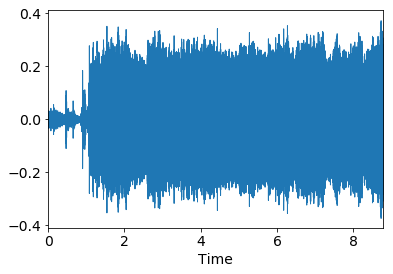

In [7]:
x, fs = librosa.load('eguitar_sample.mp3')
librosa.display.waveplot(x, sr=fs)
#source: http://www.theory.physics.ubc.ca/341-current/sweep.html

In [8]:
IPython.display.Audio(x, rate=fs)


In [9]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Log-frequency power spectrogram')

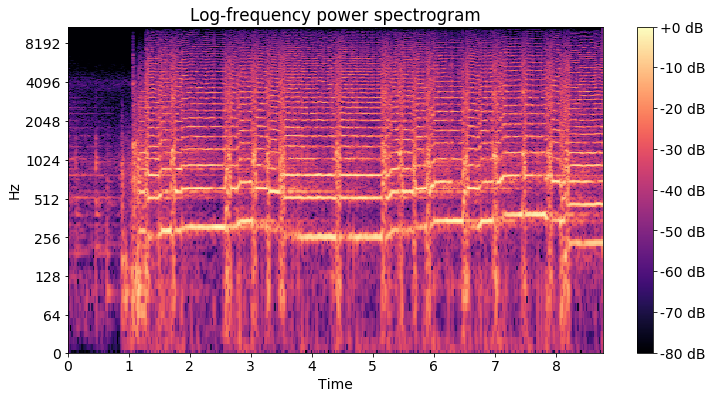

In [10]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 6))
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

In [11]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs.shape

(388, 13)


In [10]:
mfccs = sklearn.preprocessing.scale(mfccs)

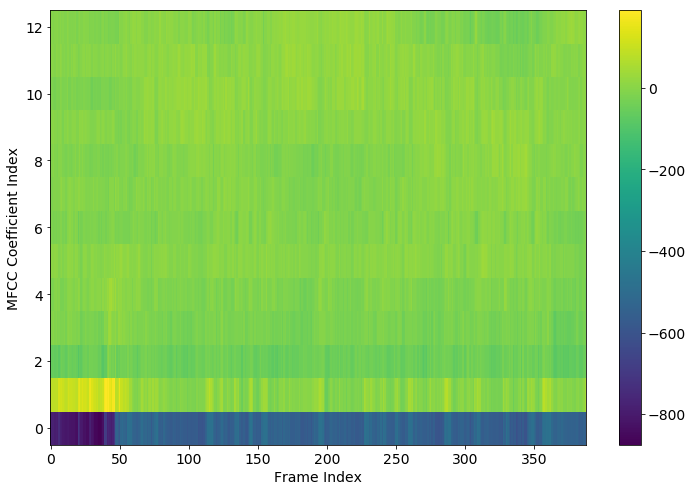

In [92]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')
plt.colorbar()

(388, 13)
[-570.28424     19.570309   -46.14639    -21.279469   -11.936004
    2.461803    -9.055442    -2.0989175   -3.8759394    7.929993
    8.56369      7.951062    -0.8890181]
[8274.298   2224.6724   209.40973  193.98492  208.10075  113.09389
  186.75546  142.16174  226.68126  169.23735  298.6882   223.64653
  400.57053]


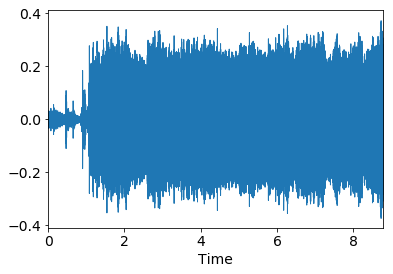

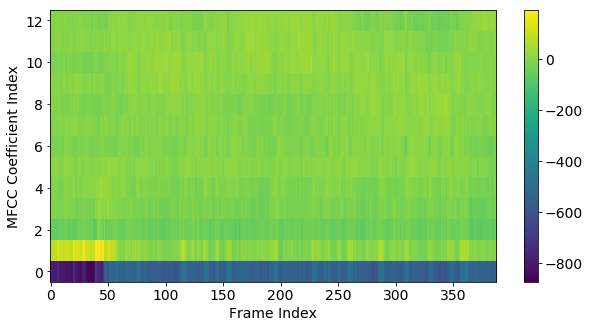

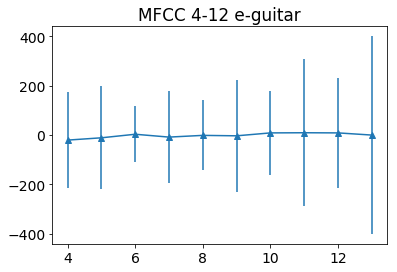

In [100]:
P, fsP = librosa.load('eguitar_sample.mp3')
librosa.display.waveplot(P, sr=fsP)
#source: http://www.theory.physics.ubc.ca/341-current/sweep.html
IPython.display.Audio(P, rate=fsP)
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500
mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(P, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs.shape
#mfccs = sklearn.preprocessing.scale(mfccs)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 5))
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')
plt.colorbar()
mfcc = librosa.feature.mfcc(y=P, sr=fsP,n_mfcc = 12)
#print(mfcc)
meanP = numpy.mean(mfccs, axis=0)
print(meanP)
varP = numpy.var(mfccs, axis=0)
print(varP)
covP = numpy.cov(mfcc)
#print(cov)

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})

plt.figure()

x = np.array([4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
y = meanP[3:]
e = varP[3:]

plt.errorbar(x, y, e, fmt='-o', marker='^')
plt.title('MFCC 4-12 e-guitar')
plt.show()

(374, 13)
[-737.8759     141.18489   -105.49151      3.2052796  -23.541857
  -15.624678     1.3887067   -6.9283767    5.7948446   23.707497
   16.08945      9.957885     7.434763 ]
[23884.705    2825.5916   1738.4406    128.21062   300.3103    142.71333
   149.08844   180.10825   193.18086   259.70392   205.32309   170.5079
   454.9531 ]


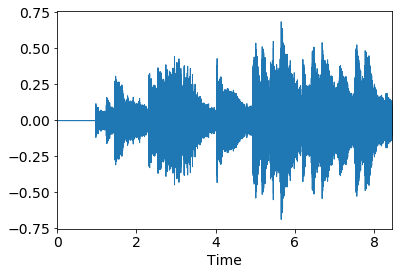

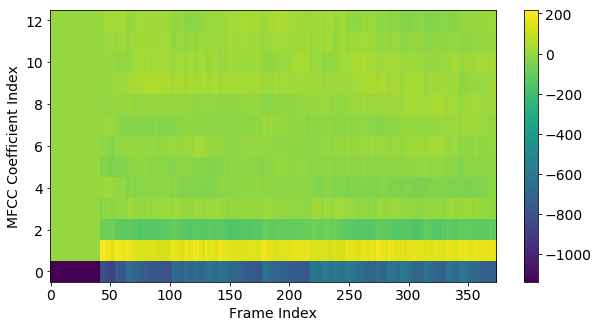

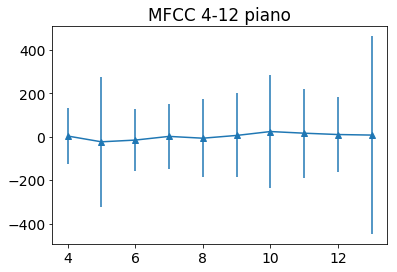

In [99]:
P, fsP = librosa.load('piano_sample.wav')
librosa.display.waveplot(P, sr=fsP)
#source: http://www.theory.physics.ubc.ca/341-current/sweep.html
IPython.display.Audio(P, rate=fsP)
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500
mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(P, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs.shape
#mfccs = sklearn.preprocessing.scale(mfccs)
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10, 5))
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')
plt.colorbar()
mfcc = librosa.feature.mfcc(y=P, sr=fsP,n_mfcc = 12)
#print(mfcc)
meanP = numpy.mean(mfccs, axis=0)
print(meanP)
varP = numpy.var(mfccs, axis=0)
print(varP)
covP = numpy.cov(mfcc)
#print(cov)

plt.figure()

import matplotlib.pyplot as plt
import numpy as np

x = np.array([ 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
y = meanP[3:]
e = varP[3:]

plt.errorbar(x, y, e, fmt='-o', marker='^')
plt.title('MFCC 4-12 piano')
plt.show()